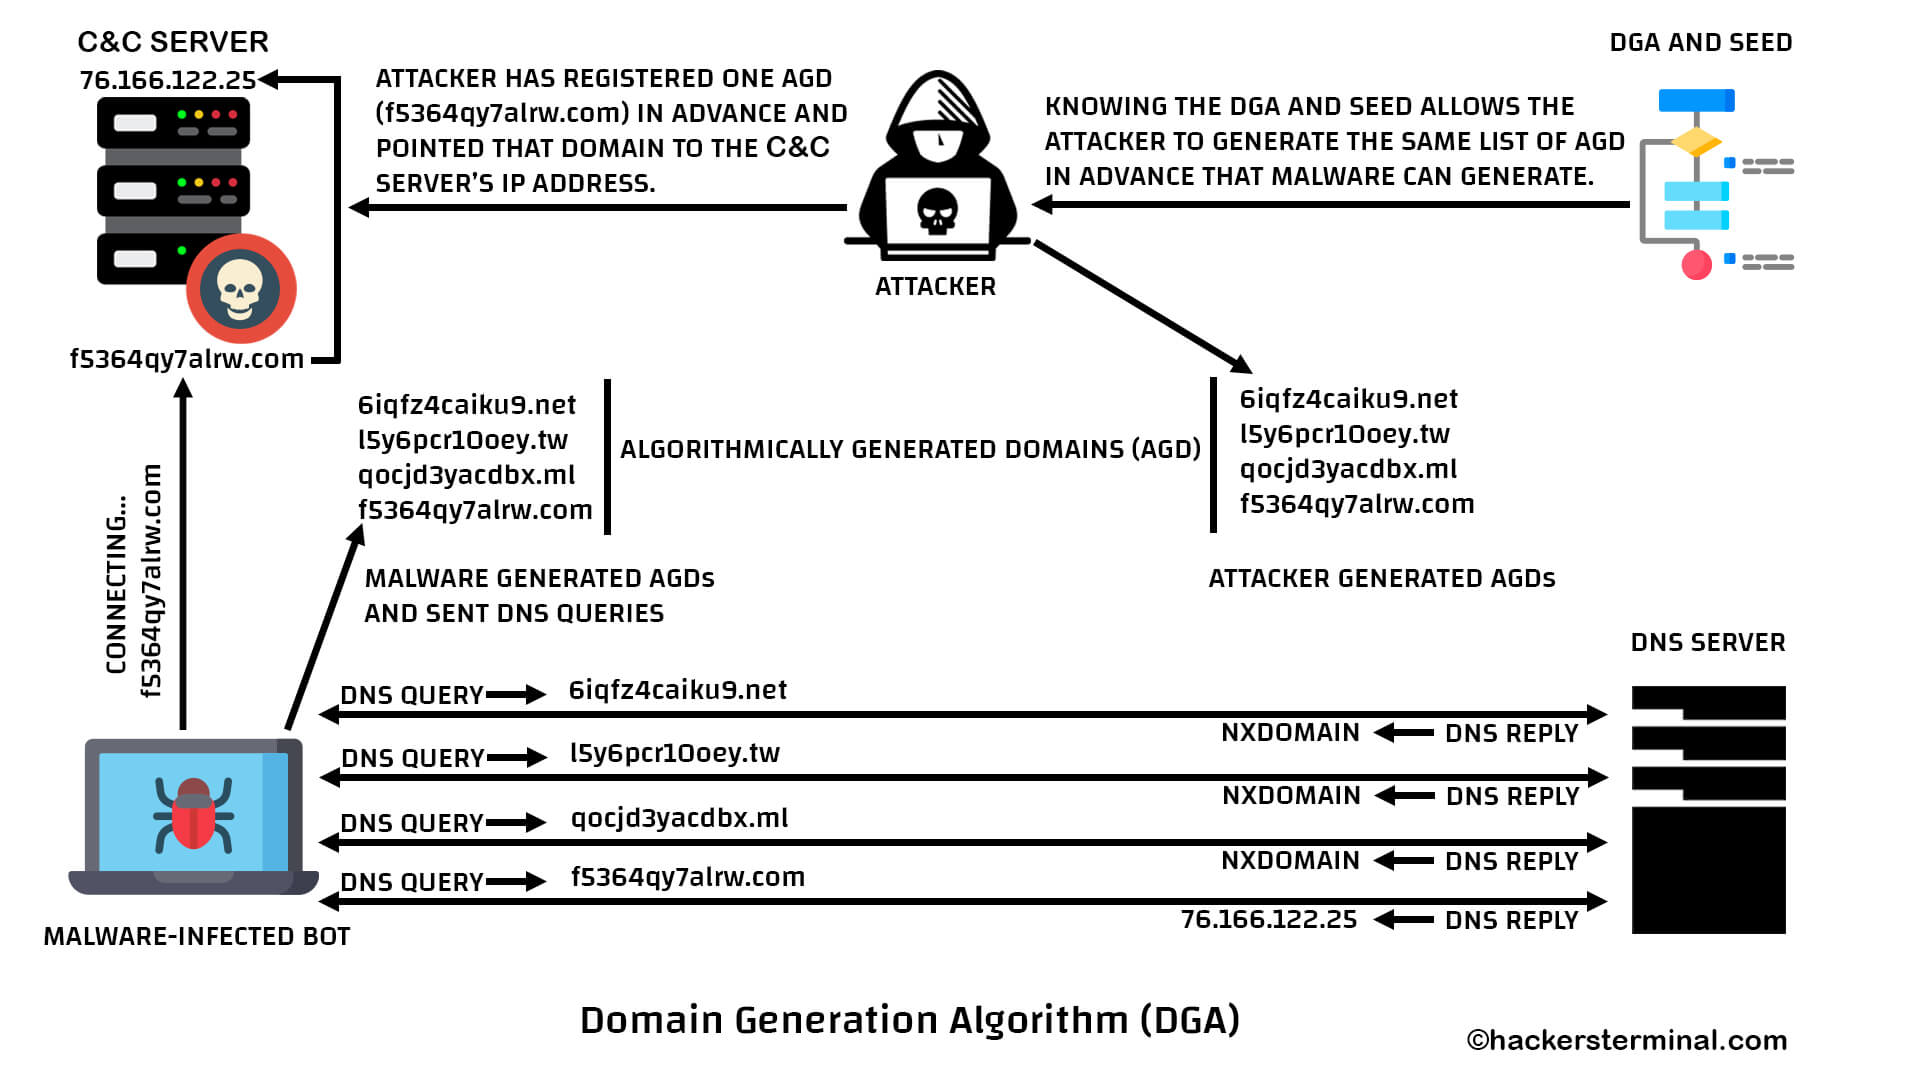

<font size="6">Business Problem</font>

- It is an algorithmic technique that creates Domain addresses in order to implement C&C (Command and Control) operations in the content of malware and to provide communication.

- Due to their short-term use and encrypted commands, they cannot be detected permanently by Dynamic Black Lists in Security devices.


<font size="6">DGA Domain Detection</font>

- With the help of modeling that we will establish with domain addresses taken from firewall network logs or DNS logs; It can be detected whether they are DGA generated or Legit (legal) domain addresses.


<font size="6">Data Sets</font>

- Dataset containing 337,398 Legit (legal) websites

- 337,500 datasets including the DGA website

- A data set of 354.984 English words

- Using the specified data sets, feature engineering is performed.


<font size="6">Features</font>

- Entropy: The randomness values of domain addresses.

- Length: The character length of domain addresses.

- Legit websites tfidf: It is the similarity rate of domain addresses with Legit Website data set.

- Eng word tfidf: It is the similarity rate of domain addresses with the Eng Word data set.

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
%matplotlib inline

In [ ]:
legit_dataframe = pd.read_csv("/Users/omurcantatar/Documents/DGA/legit_websites.csv", header=0)

In [ ]:
# Editing techniques that should be done when domain logs come in raw form:

'''
import tldextract

def domain_extract(domain):
    ext = tldextract.extract(domain)
    if (not ext.suffix):
        return np.nan
    else:
        #print(ext)
        return ext.domain
'''

'''
legit_dataframe['domain'] = [domain_extract(domain) for domain in legit_dataframe['domain']]
del legit_dataframe['value']
'''

display(legit_dataframe)

In [ ]:
legit_dataframe = legit_dataframe.dropna()
legit_dataframe = legit_dataframe.drop_duplicates()
#legit_dataframe['domain'] = legit_dataframe['domain'].map(lambda x: x.replace('-',''))

In [ ]:
display(legit_dataframe)

In [ ]:
# If we use Cross Validation, of course, there is no need for this.
# We can try the combination option, it won't reselect the previously selected indexes.

legit_dataframe = legit_dataframe.reindex(np.random.permutation(legit_dataframe.index))
legit_total = legit_dataframe.shape[0]
print('Total Legit domains %d' % legit_total)
display(legit_dataframe)


In [ ]:
file_location = "/Users/omurcantatar/Documents/DGA/dga_websites.csv"

dga_dataframe = pd.read_csv(file_location, header=0);

In [ ]:
display(dga_dataframe)

In [ ]:
# To separate the uppercase or .com/.org/.info parts:

'''
dga_dataframe2 = dga_dataframe[["raw_domain"]]
#dga_dataframe2.head()
type(dga_dataframe2)

dga_dataframe2['lower_domain'] = dga_dataframe2.applymap(lambda x: x.split('.')[0].strip().lower())

'''

In [ ]:
# We clean missing values and duplicate values.

dga_dataframe = dga_dataframe.dropna()
dga_dataframe = dga_dataframe.drop_duplicates()
#dga_dataframe['domain'] = dga_dataframe['domain'].map(lambda x: x.replace('-',''))

In [ ]:

dga_dataframe = dga_dataframe.reindex(np.random.permutation(dga_dataframe.index))
dga_total = dga_dataframe.shape[0]
print('Total DGA domains %d' % dga_total)
display(dga_dataframe)


In [ ]:
all_domains = pd.concat([legit_dataframe, dga_dataframe], ignore_index=True)

In [ ]:
display(all_domains)

In [ ]:
all_domains['length'] = [len(x) for x in all_domains['domain']]

In [ ]:
display(all_domains)

In [ ]:

import math
from collections import Counter

def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]



In [ ]:
display(all_domains)

In [ ]:
import sklearn.ensemble
from sklearn import feature_extraction

In [ ]:
# If we want to do feature engineering with CountVectorizer in addition to TFIDF:

'''
legit_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
legit_counts_matrix = legit_cv.fit_transform(legit_dataframe['domain'])
legit_counts = np.log10(legit_counts_matrix.sum(axis=0).getA1())
legit_ngrams_list = legit_cv.get_feature_names()
'''


# We are doing a feature weighting operation on the feature values in get_features_names. They have as much weight as a percentage of their overall presence in the dataset.
# all_domains['alexa_grams']= alexa_counts * legit_cv.transform(all_domains['domain']).T


In [ ]:
file_location = "/Users/omurcantatar/Documents/DGA/dicts/words.txt"

eng_dataframe = pd.read_csv(file_location, header=0, sep=' ');

In [ ]:
eng_dataframe

In [ ]:
eng_dataframe = eng_dataframe[eng_dataframe['words'].map(lambda x: str(x).isalpha())]
#eng_dataframe2 = eng_dataframe[eng_dataframe['words'].map(lambda x: str(x).isalpha())]

In [ ]:
eng_dataframe

In [ ]:
# We use it to discard the parts with spaces at the beginning or at the end, we can choose the letter or word to be stripped.

eng_dataframe = eng_dataframe.applymap(lambda x: str(x).strip().lower())

In [ ]:
eng_dataframe = eng_dataframe.dropna()
eng_dataframe = eng_dataframe.drop_duplicates()
eng_dataframe

In [ ]:
# CountVectorizer:

'''
eng_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
eng_counts_matrix = eng_cv.fit_transform(eng_dataframe['words'])
eng_counts = np.log(eng_counts_matrix.sum(axis=0).getA1())
eng_ngrams_list = eng_cv.get_feature_names()
'''

In [ ]:
# CountVectorizer:

'''
file_location = "/Users/omurcantatar/Documents/DGA/all_turkish_words.txt"
turkish_dataframe = pd.read_csv(file_location, header=0, sep=' ');

turkish_dataframe = turkish_dataframe[turkish_dataframe['words'].map(lambda x: str(x).isalpha())]

turkish_dataframe = turkish_dataframe.dropna()
turkish_dataframe = turkish_dataframe.drop_duplicates()
'''


'''
turkish_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)
turkish_counts_matrix = turkish_cv.fit_transform(turkish_dataframe['words'])
turkish_counts = np.log10(turkish_counts_matrix.sum(axis=0).getA1())
turkish_ngrams_list = turkish_cv.get_feature_names()
'''

In [ ]:
# Creating features after calculations for CountVectorizer:

#all_domains['legit_cv'] = legit_counts * legit_cv.transform(all_domains['domain']).T

#all_domains['eng_cv'] = eng_counts * eng_cv.transform(all_domains['domain']).T

#all_domains['turkish_cv'] = turkish_counts * turkish_cv.transform(all_domains['domain']).T

In [ ]:
# TFIDF:

from sklearn.feature_extraction.text import TfidfVectorizer

legit_websites_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
legit_websites_counts_matrix = legit_websites_char_vectorizer.fit_transform(legit_dataframe['domain'])
legit_websites_dict_counts = legit_websites_counts_matrix.sum(axis=0).getA1()
legit_websites_feature_names = legit_websites_char_vectorizer.get_feature_names()


all_domains['legit_websites_tfidf'] = legit_websites_dict_counts * legit_websites_char_vectorizer.transform(all_domains['domain']).T

#one_legit_websites_dict_counts = np.ones(legit_websites_dict_counts.shape)
#all_domains['legit_websites_tfidf'] = one_legit_websites_dict_counts * legit_websites_char_vectorizer.transform(all_domains['domain']).T



eng_word_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
eng_word_counts_matrix = eng_word_char_vectorizer.fit_transform(eng_dataframe['words'])
eng_word_dict_counts = eng_word_counts_matrix.sum(axis=0).getA1()
eng_word_feature_names = eng_word_char_vectorizer.get_feature_names()


all_domains['eng_word_tfidf'] = eng_word_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T

#one_eng_word_dict_counts = np.ones(eng_word_dict_counts.shape)
#all_domains['eng_word_tfidf'] = one_eng_word_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T



# If we want to create a feature with the data set consisting of Turkish words:

'''
turkish_word_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
turkish_word_counts_matrix = turkish_word_char_vectorizer.fit_transform(turkish_dataframe['words'])
turkish_word_dict_counts = np.log(turkish_word_counts_matrix.sum(axis=0).getA1())
turkish_word_feature_names = turkish_word_char_vectorizer.get_feature_names()


all_domains['turkish_word_tfidf'] = turkish_word_dict_counts * turkish_word_char_vectorizer.transform(all_domains['domain']).T
'''


# To assign values without Feature Weighting:

'''
one_dict_counts = np.ones(dict_counts_words.shape)
all_domains['tfidf']= one_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T
'''

In [ ]:
all_domains

In [ ]:
# Before outliers are removed:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13,7)})


sns.boxplot(x=all_domains['length'])

In [ ]:
sns.histplot(data=all_domains, x="length")

In [ ]:
sns.boxplot(x=all_domains['entropy'])

In [ ]:
sns.histplot(data=all_domains, x="entropy")

In [ ]:
sns.boxplot(x=all_domains['legit_websites_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="legit_websites_tfidf")

In [ ]:
sns.boxplot(x=all_domains['eng_word_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="eng_word_tfidf")

In [ ]:
#sns.boxplot(x=all_domains['turkish_word_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x="turkish_word_tfidf")

In [ ]:

def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] <= low_limit) | (dataframe[col_name] >= up_limit))]
    return df_without_outliers


all_domains = remove_outlier(all_domains, 'length')
all_domains = remove_outlier(all_domains, 'entropy')
all_domains = remove_outlier(all_domains, 'legit_websites_tfidf')
all_domains = remove_outlier(all_domains, 'eng_word_tfidf')

#all_domains = remove_outlier(all_domains, 'legit_cv')
#all_domains = remove_outlier(all_domains, 'eng_cv')
#all_domains = remove_outlier(all_domains, 'turkish_word_tfidf')


# To suppress outliers:
'''
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
'''

#replace_with_thresholds(all_domains, 'eng_word_tfidf')


In [ ]:
all_domains

In [ ]:
sns.boxplot(x=all_domains['length'])

In [ ]:
sns.histplot(data=all_domains, x="length")

In [ ]:
sns.boxplot(x=all_domains['entropy'])

In [ ]:
sns.histplot(data=all_domains, x="entropy")

In [ ]:
#all_domains.groupby('length').count().plot.bar()
sns.boxplot(x=all_domains['legit_websites_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="legit_websites_tfidf")

In [ ]:
#If we want to do log transformation:

#np.log1p(all_domains['legit_websites_tfidf'.values]

#sns.histplot(data=all_domains, x=np.log1p(all_domains['legit_websites_tfidf'].values))

In [ ]:
sns.boxplot(x=all_domains['eng_word_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="eng_word_tfidf")

In [ ]:
#sns.boxplot(x=all_domains['turkish_word_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x="turkish_word_tfidf")

In [ ]:
all_domains.groupby('class').agg({'length':['mean', 'min', 'max']})

In [ ]:
all_domains.groupby('class').agg({'entropy':['mean', 'min', 'max']})

In [ ]:
all_domains.groupby('class').agg({'legit_websites_tfidf':['mean', 'min', 'max']})

In [ ]:
all_domains.groupby('class').agg({'eng_word_tfidf':['mean', 'min', 'max']})

In [ ]:
'''
# Standartlastirma:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_domains['ss_length'] = scaler.fit_transform(all_domains[['length']])
all_domains['ss_entropy'] = scaler.fit_transform(all_domains[['entropy']])
all_domains['ss_legit_websites_tfidf'] = scaler.fit_transform(all_domains[['legit_websites_tfidf']])
all_domains['ss_eng_word_tfidf'] = scaler.fit_transform(all_domains[['eng_word_tfidf']])
all_domains['ss_turkish_word_tfidf'] = scaler.fit_transform(all_domains[['turkish_word_tfidf']])
'''

In [ ]:
#sns.boxplot(x=all_domains['ss_legit_websites_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x='ss_legit_websites_tfidf')

In [ ]:
'''
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()
'''


'''
# Normalizasyon:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

all_domains['mm_length'] = minmax_scaler.fit_transform(all_domains[['length']])
all_domains['mm_entropy'] = minmax_scaler.fit_transform(all_domains[['entropy']])
all_domains['mm_legit_websites_tfidf'] = minmax_scaler.fit_transform(all_domains[['legit_websites_tfidf']])
all_domains['mm_eng_word_tfidf'] = minmax_scaler.fit_transform(all_domains[['eng_word_tfidf']])
all_domains['mm_turkish_word_tfidf'] = minmax_scaler.fit_transform(all_domains[['turkish_word_tfidf']])
'''

In [ ]:
#sns.boxplot(x=all_domains['mm_legit_websites_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x='mm_legit_websites_tfidf')

In [ ]:
all_domains.loc[all_domains["class"] == "dga", "class"] = 1
all_domains.loc[all_domains["class"] == "legit", "class"] = 0

In [ ]:
all_domains

In [ ]:
# Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

X = all_domains[['length', 'entropy', 'legit_websites_tfidf', 'eng_word_tfidf']]
y = np.array(all_domains['class'].tolist())
# y = all_domains['class'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)*100


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:

'''
rf_params = {#"max_depth": [2, 3, 5, 7, None],
             #"min_samples_split": [2, 5, 10, 15],
             "n_estimators": [50, 100]}


rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_).fit(X, y)

cv_results = cross_validate(rf_final, X, y, cv=5, scoring=["accuracy", "roc_auc", "f1", "recall", "precision"])

print(cv_results['test_accuracy'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_precision'].mean())
'''


In [ ]:
#rf_best_grid.best_params_

In [ ]:

import collections, numpy


counter = collections.Counter(y_train)
print(counter)

counter2 = collections.Counter(y_test)
print(counter2)


In [ ]:

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)


'''
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=5):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

val_curve_params(rf_final, X, y, "n_estimators", range(0, 75), scoring="roc_auc")
'''

In [ ]:
plt.figure(figsize=(16, 8))
corrMatrix = all_domains.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:

def dga_detect(domain):
    legit_websites_tfidf_match = legit_websites_dict_counts * legit_websites_char_vectorizer.transform([domain]).T
    
    eng_word_tfidf_match = eng_word_dict_counts * eng_word_char_vectorizer.transform([domain]).T
    
    _X = [len(domain), entropy(domain), legit_websites_tfidf_match, eng_word_tfidf_match]
    
    #print('%s : %s' % (domain, rf_model.predict([_X])[0]))
    #print(type(_X))
    #print(_X)
    print([_X][0])
    #return str(rf_model.predict([_X]))
    #return str(rf_final.predict([_X])[0])
    
    # DataFrame is expected in predict function i.e. 2D array. Since _X is in a list structure, it is a 1D array.
    return str(rf_model.predict([_X])[0])

print(dga_detect('miuul'))


In [ ]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_model.score(X_test,y_test)*100


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_model.score(X_test,y_test)*100


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:
all_domains['class'].value_counts()

In [ ]:
legit_dataframe['domain'].shape

In [ ]:
dga_dataframe['domain'].shape

In [ ]:
all_domains[all_domains['eng_word_tfidf'] == 0]

In [ ]:
all_domains[all_domains['legit_websites_tfidf'] == 0].shape

In [ ]:
all_domains[all_domains['legit_websites_tfidf'] < 0]

In [ ]:
all_domains[all_domains['eng_word_tfidf'] < 0]

In [ ]:
all_domains.describe().T

In [ ]:

plt.figure(figsize=(15,8))

sns.scatterplot(x=all_domains['legit_websites_tfidf'], y=all_domains['eng_word_tfidf'],
                hue=all_domains['class'])
plt.show()


In [ ]:

plt.figure(figsize=(15,8))

sns.scatterplot(x=all_domains['legit_websites_tfidf'], y=all_domains['entropy'],
                hue=all_domains['class'])
plt.show()


In [ ]:

plt.figure(figsize=(15,8))

sns.scatterplot(x=all_domains['eng_word_tfidf'], y=all_domains['entropy'],
                hue=all_domains['class'])
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
gb_model.score(X_test,y_test)*100

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:
import xgboost
from xgboost import XGBClassifier


xgb_model = XGBClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_model.score(X_test,y_test)*100

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
cat_model.score(X_test,y_test)*100

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:
# If we want using log transformation:

all_domains['log_legit_websites_tfidf'] = np.log1p(all_domains['legit_websites_tfidf'])
all_domains['log_eng_word_tfidf'] = np.log1p(all_domains['eng_word_tfidf'])

In [ ]:
all_domains.describe().T

In [ ]:
# Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

X = all_domains[['length', 'entropy', 'log_legit_websites_tfidf', 'log_eng_word_tfidf']]
y = np.array(all_domains['class'].tolist())
# y = all_domains['class'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)*100


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))